In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import missingno as msno # To plot null values 
import pickle # To save dataframes/models


In [2]:
# Import Datasets
# Books csv
books = pd.read_csv('Books.csv')
books

C:\Users\Rajesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [3]:
# Ratings csv
ratings = pd.read_csv('Ratings.csv')
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [4]:
# Users csv
users = pd.read_csv('Users.csv')
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [5]:
# Function to convert insecure image link to secure ones.
def replaceURL(data):
    columns = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']
    for i in columns:
        data[i] = data[i].str.replace('http://', 'https://')
    
    return data

In [6]:
# Func call
books = replaceURL(books)
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....,https://images.amazon.com/images/P/0195153448....
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....,https://images.amazon.com/images/P/0002005018....
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,https://images.amazon.com/images/P/0060973129....,https://images.amazon.com/images/P/0060973129....,https://images.amazon.com/images/P/0060973129....
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,https://images.amazon.com/images/P/0374157065....,https://images.amazon.com/images/P/0374157065....,https://images.amazon.com/images/P/0374157065....
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,https://images.amazon.com/images/P/0393045218....,https://images.amazon.com/images/P/0393045218....,https://images.amazon.com/images/P/0393045218....
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),https://images.amazon.com/images/P/0440400988....,https://images.amazon.com/images/P/0440400988....,https://images.amazon.com/images/P/0440400988....
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,https://images.amazon.com/images/P/0525447644....,https://images.amazon.com/images/P/0525447644....,https://images.amazon.com/images/P/0525447644....
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,https://images.amazon.com/images/P/006008667X....,https://images.amazon.com/images/P/006008667X....,https://images.amazon.com/images/P/006008667X....
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,https://images.amazon.com/images/P/0192126040....,https://images.amazon.com/images/P/0192126040....,https://images.amazon.com/images/P/0192126040....


In [7]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [8]:
# Find the count of null values
print("\nBOOKS \n\n",books.isnull().sum())
print("\nRATINGS \n\n",ratings.isnull().sum())
print("\nUSERS \n\n",users.isnull().sum())


BOOKS 

 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

RATINGS 

 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

USERS 

 User-ID          0
Location         0
Age         110762
dtype: int64


In [9]:
# Age column has nearly 50% records as null ! But it is'nt a prob, we wont't be using that 

In [10]:
# Find if there are any duplicate values 
print("\nBOOKS \n\n",books.duplicated().sum())
print("\nRATINGS \n\n",ratings.duplicated().sum())
print("\nUSERS \n\n",users.duplicated().sum())


BOOKS 

 0

RATINGS 

 0

USERS 

 0


<AxesSubplot:>

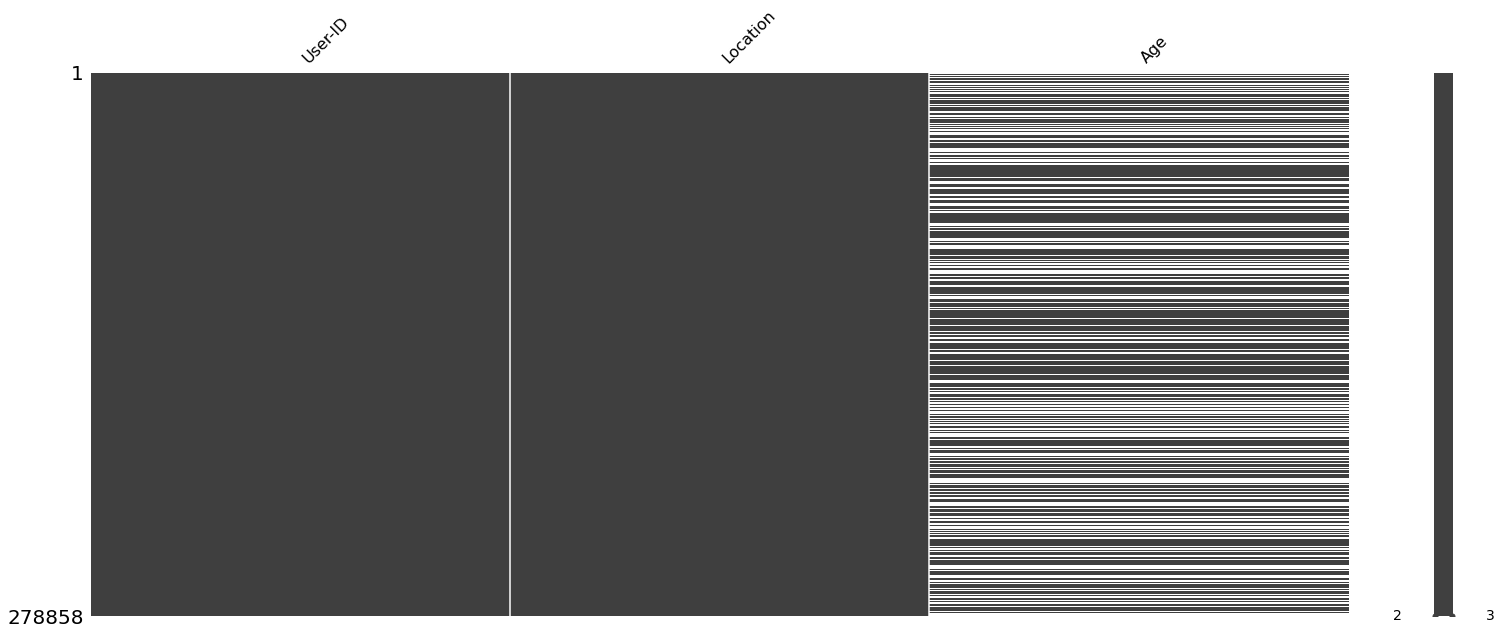

In [11]:
# Plot missing values in 'Users' dataframe
msno.matrix(users)

In [12]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

## <p style="text-align: center;font-style:italic">Popularity Based Recommendation</p>


###### Recommend books which has more than 250 user ratings, and sort them descending

In [13]:
# Merge 'ratings' and 'books' dataframes
merged_df = ratings.merge(books, on='ISBN')
merged_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,https://images.amazon.com/images/P/0517145553....,https://images.amazon.com/images/P/0517145553....,https://images.amazon.com/images/P/0517145553....
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,https://images.amazon.com/images/P/1575660792....,https://images.amazon.com/images/P/1575660792....,https://images.amazon.com/images/P/1575660792....
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,https://images.amazon.com/images/P/0590907301....,https://images.amazon.com/images/P/0590907301....,https://images.amazon.com/images/P/0590907301....
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,https://images.amazon.com/images/P/0679752714....,https://images.amazon.com/images/P/0679752714....,https://images.amazon.com/images/P/0679752714....


In [14]:
ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [15]:
popularity_df = pd.DataFrame()  

# Group the movies on count of user ratings
popularity_df['Ratings-count'] = merged_df.groupby('Book-Title').count()['Book-Rating']

# calc mean values of ratings for each book 
# (total sum of rating) / (no of ratings)            
popularity_df['Mean-of-Ratings'] = merged_df.groupby('Book-Title').mean()['Book-Rating']
popularity_df.reset_index()
popularity_df

,Ratings-count,Mean-of-Ratings
Book-Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.250000
Always Have Popsicles,1,0.000000
Apple Magic (The Collector's series),1,0.000000
"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.000000
...,...,...
Ã?Â?lpiraten.,2,0.000000
Ã?Â?rger mit Produkt X. Roman.,4,5.250000
Ã?Â?sterlich leben.,1,7.000000


In [16]:
popularity_df = popularity_df[popularity_df['Ratings-count'] >= 250].sort_values('Mean-of-Ratings', 
                                                                                 ascending=False)
popularity_df 

,Ratings-count,Mean-of-Ratings
Book-Title,,
Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
Harry Potter and the Goblet of Fire (Book 4),387,5.824289
Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
Harry Potter and the Order of the Phoenix (Book 5),347,5.501441
Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...
Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
Whispers,286,2.199301
Presumed Innocent,294,2.139456


In [17]:
# Pick only the top 50 books 
popularity_df = popularity_df.head(50) 
popularity_df

,Ratings-count,Mean-of-Ratings
Book-Title,,
Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
Harry Potter and the Goblet of Fire (Book 4),387,5.824289
Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
Harry Potter and the Order of the Phoenix (Book 5),347,5.501441
Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
The Hobbit : The Enchanting Prelude to The Lord of the Rings,281,5.007117
"The Fellowship of the Ring (The Lord of the Rings, Part 1)",368,4.948370
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),575,4.895652
"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769


In [18]:
# Now we need Author name, Image link, Year of publication from 'books' df
# while combining, we get more records bcoz of duplicate book titles, hence remove them
popularity_df = popularity_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','Ratings-count','Mean-of-Ratings']]
popularity_df

,Book-Title,Book-Author,Image-URL-M,Ratings-count,Mean-of-Ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,https://images.amazon.com/images/P/0439136350....,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,https://images.amazon.com/images/P/0439139597....,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,https://images.amazon.com/images/P/0590353403....,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,https://images.amazon.com/images/P/043935806X....,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,https://images.amazon.com/images/P/0439064872....,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339681....,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339703....,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,https://images.amazon.com/images/P/059035342X....,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,https://images.amazon.com/images/P/0345339711....,260,4.880769
39,To Kill a Mockingbird,Harper Lee,https://images.amazon.com/images/P/0446310786....,510,4.700000


In [19]:
popularity_df.shape

(50, 5)

## <p style="text-align: center;font-style:italic">Collaborative Filtering Recommendation System</p>


### *User Based*

In [20]:
# Consider users who have rated more than 200 books (Experienced Users)
users_200 = merged_df.groupby('User-ID').count()['Book-Rating'] > 200
users_200[users_200] # display the users (Boolean Indexing method)

User-ID
254       True
2276      True
2766      True
2977      True
3363      True
          ... 
274308    True
275970    True
277427    True
277639    True
278418    True
Name: Book-Rating, Length: 811, dtype: bool

In [21]:
# Store their index
user_index = users_200[users_200].index 

# Boolean Series indexing - fetching only true values
filtered_ratings = merged_df[merged_df['User-ID'].isin(user_index)]

# Filtered Dataframe( of users who have rated more than 200 books )
filtered_ratings 


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....,https://images.amazon.com/images/P/034545104X....
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,https://images.amazon.com/images/P/1880837927....,https://images.amazon.com/images/P/1880837927....,https://images.amazon.com/images/P/1880837927....
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,https://images.amazon.com/images/P/188717897X....,https://images.amazon.com/images/P/188717897X....,https://images.amazon.com/images/P/188717897X....
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,https://images.amazon.com/images/P/1888889047....,https://images.amazon.com/images/P/1888889047....,https://images.amazon.com/images/P/1888889047....
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),https://images.amazon.com/images/P/1931868123....,https://images.amazon.com/images/P/1931868123....,https://images.amazon.com/images/P/1931868123....


### *Combining User Based with Item based*

In [22]:
# Filter the Dataframe ( books that have been rated by more than 50 people )
filtered_books = filtered_ratings.groupby('Book-Title').count()['Book-Rating'] >= 50
filtered_books

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    False
 Always Have Popsicles                                                                                        False
 Apple Magic (The Collector's series)                                                                         False
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   False
 Clifford Visita El Hospital (Clifford El Gran Perro Colorado)                                                False
                                                                                                              ...  
Ã?Â?ber das Fernsehen.                                                                                        False
Ã?Â?ber die Pflicht zum Ungehorsam gegen den Staat.                                                           False
Ã?Â?lpiraten.                                                

In [23]:
# Using boolean indexing, fetch records ( books that have been rated by more than 50 people )
filtered_books[filtered_books]

Book-Title
1984                                                                 True
1st to Die: A Novel                                                  True
2nd Chance                                                           True
4 Blondes                                                            True
A Bend in the Road                                                   True
                                                                     ... 
Year of Wonders                                                      True
You Belong To Me                                                     True
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values    True
Zoya                                                                 True
\O\" Is for Outlaw"                                                  True
Name: Book-Rating, Length: 706, dtype: bool

In [24]:
# Retrieve the index
famous_books = filtered_books[filtered_books].index
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [25]:
# Applying book>=50 (Item) condition in user_ratings>200 (User) 'filtered_ratings' dataframe 
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,https://images.amazon.com/images/P/0531001725....,https://images.amazon.com/images/P/0531001725....,https://images.amazon.com/images/P/0531001725....
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,https://images.amazon.com/images/P/0670809381....,https://images.amazon.com/images/P/0670809381....,https://images.amazon.com/images/P/0670809381....
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,https://images.amazon.com/images/P/0440910927....,https://images.amazon.com/images/P/0440910927....,https://images.amazon.com/images/P/0440910927....
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,https://images.amazon.com/images/P/B0001PIOX4....,https://images.amazon.com/images/P/B0001PIOX4....,https://images.amazon.com/images/P/B0001PIOX4....


In [26]:
# Check for duplicates
final_ratings.drop_duplicates
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....,https://images.amazon.com/images/P/0446520802....
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,https://images.amazon.com/images/P/0531001725....,https://images.amazon.com/images/P/0531001725....,https://images.amazon.com/images/P/0531001725....
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,https://images.amazon.com/images/P/0670809381....,https://images.amazon.com/images/P/0670809381....,https://images.amazon.com/images/P/0670809381....
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,https://images.amazon.com/images/P/0440910927....,https://images.amazon.com/images/P/0440910927....,https://images.amazon.com/images/P/0440910927....
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,https://images.amazon.com/images/P/B0001PIOX4....,https://images.amazon.com/images/P/B0001PIOX4....,https://images.amazon.com/images/P/B0001PIOX4....


In [27]:
# Create a pivot table 
pivot = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [28]:
# Replace null values with zero
pivot.fillna(0,inplace=True)
pivot

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pivot)
similarity_scores[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [30]:
similarity_scores.shape

(706, 706)

In [67]:
# Function to recommend books
def recommend(bookName):
    
    # Returns the index os the book in pivot df
    index = np.where(pivot.index == bookName)[0][0]
    
    # Find similarity scores for each book
    # Sort the recommmended books in Desc order  
    recommended_books = sorted(list(enumerate(similarity_scores[index])),
                               key=lambda x:x[1], reverse=True)
    
    # Pick the top 5 recommended books
    recommended_books = recommended_books[1:6]
    
    # to store 5 records
    data = []
    
    for idx in recommended_books:
        item = []
        #         print(pivot.index[idx[0]])
        temp_df = books[books['Book-Title'] == pivot.index[idx[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        data.append(item)
        
    return data
        

In [68]:
recommend('Middlesex: A Novel')

[["She's Come Undone (Oprah's Book Club (Paperback))",
  'Wally Lamb',
  'https://images.amazon.com/images/P/0671003755.01.MZZZZZZZ.jpg'],
 ['The Secret Life of Bees',
  'Sue Monk Kidd',
  'https://images.amazon.com/images/P/0142001740.01.MZZZZZZZ.jpg'],
 ['The Da Vinci Code',
  'Dan Brown',
  'https://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg'],
 ["I Know This Much Is True (Oprah's Book Club)",
  'Wally Lamb',
  'https://images.amazon.com/images/P/0060391626.01.MZZZZZZZ.jpg'],
 ['Prodigal Summer',
  'Barbara Kingsolver',
  'https://images.amazon.com/images/P/0060199652.01.MZZZZZZZ.jpg']]

In [37]:
# Save the pivot dataframe for FrontEnd processing
pickle.dump(pivot, open("pivot.pkl", "wb"))

In [ ]:
# Save the similarity_scores dataframe for FrontEnd processing
pickle.dump(similarity_scores, open("similarity_scores.pkl", "wb"))

In [69]:
# Save the books dataframe for FrontEnd processing
pickle.dump(books, open("books.pkl", "wb"))

In [38]:
pivot.to_csv('Pivot.csv')

In [39]:
pvt = pd.read_csv('Pivot.csv')
pvt

,Book-Title,254,2276,2766,2977,3363,4017,4385,6251,6323,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
0,1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
702,You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,Zen and the Art of Motorcycle Maintenance: An ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
loaded_df = pd.read_pickle('pivot.pkl')
loaded_df

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
